# AgriSense
## A Market Recommender and Price Prediction System for Maize, Tomatoes, and Avocados in Kenya

**BY: Knight Mbithe, Enid Kibet, Joy Gitau,  John Louis Kirigo and Caleb Kipkech.**

![My Image](Images/photo0.webp)

# 1. Business Understading
## 1.1 Business Overview
Agriculture is the backbone of Kenya’s economy, contributing over 20% of GDP and employing more than 40% of the workforce. However, smallholder farmers and traders face significant challenges, including market access limitations, price volatility, and unpredictable climatic conditions. These factors lead to income instability, post-harvest losses, and inefficient supply chains.
Traditional market decision-making in Kenya relies on manual surveys and informal networks, which are often inaccurate, outdated, and lack predictive power. As a result, farmers and traders struggle to determine the best markets to sell their produce and to anticipate fluctuations in crop prices.

## 1.2 Problem Statement
Kenyan farmers and traders lack reliable market intelligence to guide pricing and market selection decisions. Without accurate price forecasts and demand analytics, they suffer from unstable incomes, post-harvest losses, and inefficient supply chains.

To address this, AgriSense proposes a deep learning-powered market recommender and price forecasting system that leverages:
- Historical price data
- Weather conditions
- NDVI (vegetation health index)
- Supply-demand factors
- Transport costs and infrastructure quality
- Macroeconomic indicators (inflation, exchange rates, fuel costs)

## 1.3 Objectives
### 1.3.1 Main Objective
To develop a deep learning-powered market recommender and price forecasting system integrating historical price data, weather conditions, NDVI index, supply-demand factors, transport costs, and macroeconomic indicators to optimize decision-making for farmers and traders.

### 1.3.2 Specific Objectives
Market Price Prediction – Build a deep learning model to predict future prices of maize, tomatoes, and avocados by utilizing historical pricing data, climate variables, and demand-supply trends.

Market Recommender System – Develop a system to suggest the best markets based on demand-supply dynamics, price trends, transport costs, and road infrastructure quality.

Real-Time Data Integration – Integrate real-time data sources on market price feeds to enhance prediction accuracy.

User-Friendly Dashboard – Create an accessible dashboard to provide real-time price forecasts, market recommendations, and insights based on macroeconomic conditions.

## 1.4 Success Criteria
Prediction Accuracy: Models should achieve at least 85% accuracy (evaluated using MAPE and RMSE).

Market Recommendation Efficiency: The recommender should correctly identify high-profit markets at least 85% of the time (evaluated using precision, recall, and F1-score).

Pilot Testing: Conduct a small-scale test with selected farmers or traders to measure usability and impact.

Deployment Feasibility: Ensure trained models are ready for integration into a user-friendly platform.


# 2. Data Understanding

Our data was sourced from the following sources:
- [FAOSTAT](https://www.fao.org/faostat/en/#data/)
- [KAMIS](https://amis.co.ke/site/market)
- [CBK Monthly Economic Indicators Reports](https://www.centralbank.go.ke/monthly-economic-indicators/)
- [Ministry of Roads and Transport Annual Report](https://www.transport.go.ke)
- [Kenya Urban Roads Authority (KURA) Annual Reports](https://kura.go.ke)
- [Kenya Rural Roads Authority (KeRRA) Project Reports](https://kerra.go.ke)

We then compiled the data that was relevant to our analysis from each to form an `enhanced_market_dataset.csv` which we use in this notebook. We'll begin by previewing the data.

In [30]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from Classes import DataUnderstanding, EDA

In [3]:
#loading the data
df = pd.read_csv("enhanced_market_dataset.csv")

#previewing the data
df.head()

,Date,Price (KES/kg),Market Demand Factor,NDVI Index,Market,County,Retail,Temperature (°C),Humidity (%),Rainfall (mm),Crop,Month,Year,Season,Average Transport Cost (KES/km),Road Infrastructure Quality Index,Inflation Rate (%),Food Inflation (%),Fuel Inflation (%),Exchange Rate (KES/USD)
0,2024-10-10,30.0,0.874540,0.597815,Kipkaren,Kakamega,50.0,21.714509,72.476894,74.299546,Avocado,10,2024,Harvesting,10.618102,3.0,6.247241,8.967429,11.406126,130.956537
1,2024-10-10,75.0,1.450714,0.562021,Kimilili town,Bungoma,100.0,33.369485,44.648370,230.078112,Avocado,10,2024,Harvesting,19.260715,3.0,9.704286,9.641174,10.067173,135.421236
2,2024-10-10,56.0,1.231994,0.300125,Kalundu,Kitui,100.0,27.972654,78.401591,87.477061,Avocado,10,2024,Harvesting,15.979909,2.0,8.391964,9.223576,7.028705,139.612694
3,2024-10-10,55.0,1.098658,0.724650,Mwatate,Taita-Taveta,60.0,32.789410,81.101858,214.489439,Avocado,10,2024,Harvesting,13.979877,4.0,7.591951,6.168122,14.021691,144.158965
4,2024-10-09,25.0,0.656019,0.344342,Sabatia,Kakamega,40.0,24.057928,45.508103,120.197286,Avocado,10,2024,Harvesting,10.618102,3.0,4.936112,11.120914,10.783592,134.882790


In [4]:
#previewing the data details
du = DataUnderstanding(df)
du.full_report()


 First 5 Rows:
         Date  Price (KES/kg)  Market Demand Factor  NDVI Index  \
0  2024-10-10            30.0              0.874540    0.597815   
1  2024-10-10            75.0              1.450714    0.562021   
2  2024-10-10            56.0              1.231994    0.300125   
3  2024-10-10            55.0              1.098658    0.724650   
4  2024-10-09            25.0              0.656019    0.344342   

          Market        County Retail  Temperature (°C)  Humidity (%)  \
0       Kipkaren      Kakamega   50.0         21.714509     72.476894   
1  Kimilili town       Bungoma  100.0         33.369485     44.648370   
2        Kalundu         Kitui  100.0         27.972654     78.401591   
3        Mwatate  Taita-Taveta   60.0         32.789410     81.101858   
4        Sabatia      Kakamega   40.0         24.057928     45.508103   

   Rainfall (mm)     Crop  Month  Year      Season  \
0      74.299546  Avocado     10  2024  Harvesting   
1     230.078112  Avocado     10  

The dataset consists of 51,425 rows and 20 columns, capturing various factors related to agricultural markets, pricing, demand, weather conditions, transport, infrastructure, and economic indicators.
Below is an overview of the key attributes:

- Date: The timestamp indicating when the data was recorded.
- Price (KES/kg): The price of a specific crop per kilogram in Kenyan Shillings (KES).
- Market Demand Factor: A numerical representation of the demand level in the market.
- NDVI Index: The Normalized Difference Vegetation Index, which measures vegetation health.
- Market: The specific market where the data was collected.
- County: The county in Kenya where the market is located.
- Retail: Indicates whether the price is at the retail level.
- Temperature (°C): The recorded temperature in degrees Celsius.
- Humidity (%): The humidity level as a percentage.
- Rainfall (mm): The recorded rainfall in millimeters.
- Crop: The type of crop associated with the price data.
- Month: The month in which the data was recorded.
- Year: The year of data collection.
- Season: The agricultural season (e.g., long rains, short rains, dry season).
- Average Transport Cost (KES/km): The average transport cost per kilometer in Kenyan Shillings.
- Road Infrastructure Quality Index: A measure of road conditions affecting transportation.
- Inflation Rate (%): The general inflation rate in percentage.
- Food Inflation (%): The inflation rate specific to food prices.
- Fuel Inflation (%): The inflation rate related to fuel prices.
- Exchange Rate (KES/USD): The exchange rate of Kenyan Shillings to US Dollars.

# 3. Data Preparation

## 3.1 Data Cleaning

### 3.1.1 Validity
To ensure data validity, we clean and standardize the dataset by removing any leading or trailing whitespaces, converting columns to their appropriate data types, and ensuring consistent formatting. These steps enhance data integrity, making it more reliable for analysis.

#### 3.1.1.1 Incorrect Data Types: Date & Retail 

In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')
df = df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2024-12-31')]

In [6]:
# Clean the 'Rainfall (mm)' column before conversion
df['Retail'] = df['Retail'].astype(str).str.strip()  # Remove spaces
df['Retail'] = df['Retail'].str.replace(r'[^0-9.]', '', regex=True)  # Keep only numbers and dots
df['Retail'] = pd.to_numeric(df['Retail'], errors='coerce')  # Convert to numeric
# df['Retail']= df['Retail'].fillna(df['Retail'].median()) # fill 

#### 3.1.1.2 Illogical or Invalid Values:

In [7]:
# Temparature - based on the average temperatures in Kenya
df.loc[(df['Temperature (°C)'] < 0) | (df['Temperature (°C)'] > 50), 'Temperature (°C)'] = np.nan
df = df.dropna(subset=['Temperature (°C)'])


In [8]:
# Fixing Humidity (Humidity (%))
df['Humidity (%)'] = df['Humidity (%)'].clip(lower=0, upper=100)


In [9]:
# Fixing Market Demand Factor- This value should not be negative in economics.
df['Market Demand Factor'] = df['Market Demand Factor'].abs()

In [10]:
# Fixing Rainfall (Rainfall (mm))- cannot be negative
df.loc[df['Rainfall (mm)'] < 0, 'Rainfall (mm)'] = 0

In [11]:
# Fixing abnormal values in the Retail column based on market prices
df = df[(df['Retail'] >= 10) & (df['Retail'] <= 400) & (df['Price (KES/kg)'] >= 0) & (df['Price (KES/kg)'] <= 500)]


#### 3.1.1.3 Invalid Dates

In [12]:
from datetime import datetime

today = datetime.today().date()
df.loc[df['Date'] > pd.to_datetime(today), 'Date'] = np.nan # days to today
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%Y-%m-%d')


#### 3.1.1.4 Removing any spaces in the entire dataframe

In [13]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

### 3.1.2 Completeness
To ensure data completeness, missing values are identified and handled appropriately ensuring the dataset remains comprehensive and reliable for analysis

In [14]:
#checking for missing values
df.isnull().sum()

Date                                   0
Price (KES/kg)                         0
Market Demand Factor                   0
NDVI Index                             0
Market                                 0
County                               212
Retail                                 0
Temperature (°C)                       0
Humidity (%)                           0
Rainfall (mm)                          0
Crop                                   0
Month                                  0
Year                                   0
Season                                 0
Average Transport Cost (KES/km)      212
Road Infrastructure Quality Index    212
Inflation Rate (%)                     0
Food Inflation (%)                     0
Fuel Inflation (%)                     0
Exchange Rate (KES/USD)                0
dtype: int64

In [15]:
# Price (KES/kg) and County column
df = df.dropna(subset=['Price (KES/kg)', 'County', 'Average Transport Cost (KES/km)', 'Road Infrastructure Quality Index'])
df = df.rename(columns={'Price (KES/kg)': 'Wholesale'})

### 3.1.3. Accuracy
To ensure data accuracy, outliers and extreme values are identified and addressed. Statistical methods such as the IQR (Interquartile Range) and Z-score analysis are used to detect anomalies. Depending on the context, extreme values are either corrected, capped, or removed if they result from data entry errors or inconsistencies. This step enhances the reliability of the dataset for meaningful analysis.

In [16]:
# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns
outlier_counts = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)
print(outlier_counts)# print the outliers
# Drop outliers since it is a small percentage of the data
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.shape

{'Wholesale': 1414, 'Market Demand Factor': 0, 'NDVI Index': 0, 'Retail': 1842, 'Temperature (°C)': 0, 'Humidity (%)': 0, 'Rainfall (mm)': 0, 'Month': 0, 'Year': 0, 'Average Transport Cost (KES/km)': 0, 'Road Infrastructure Quality Index': 0, 'Inflation Rate (%)': 0, 'Food Inflation (%)': 0, 'Fuel Inflation (%)': 0, 'Exchange Rate (KES/USD)': 0}


(46929, 20)

### 3.1.4. Consistency
To ensure data consistency, categorical values are standardized by correcting any discrepancies in spelling, formatting, or naming conventions. This includes unifying variations of the same category for example we see `Nairobii` and `Nairobi`, and ensuring uniform capitalization and spacing. Standardizing categorical data helps maintain coherence and improves the accuracy of analysis and modeling.

In [17]:
# Checking for duplicates and removing duplicates
df.duplicated().sum()

0

In [18]:
# Checking for any spelling errors in Market and County columns
print(df['County'].unique())

['Kakamega' 'Bungoma' 'Kitui' 'Taita-Taveta' 'Embu' 'Siaya'
 'Tharaka-Nithi' 'Kirinyaga' 'Kilifi' 'Meru' 'Muranga' 'Kwale' 'Nyamira'
 'Bomet' 'Makueni' 'Trans-Nzoia' 'Nairobi' 'Nandi' 'Nairobii'
 'Uasin-Gishu' 'Migori' 'Kisumu' 'Nyandarua' 'Busia' 'Kisii' 'Nakuru'
 'Vihiga' 'Kericho' 'Nyeri' 'Garissa' 'Lamu' 'Kajiado' 'Laikipia'
 'West-Pokot' 'Samburu' 'Mombasa' 'Homa-bay' 'Baringo' 'Elgeyo-Marakwet'
 'Turkana' 'Machakos' 'Wajir' 'Mandera' 'Isiolo' 'Narok' 'Tana-River'
 'Kiambu' 'Marsabit']


In [19]:
# Fix known spelling errors
fix_typos = {'Nairobii': 'Nairobi'}
df['County'] = df['County'].replace(fix_typos)

In [20]:
# Check for trailing spaces
df['Market'].unique()

array(['Kipkaren', 'Kimilili town', 'Kalundu', 'Mwatate', 'Sabatia',
       'Embu Town', 'Makutano Embu', 'Bondo', 'Chuka', 'Ngurubani Market',
       'Aram', 'Gongoni', 'Charo wa Mae', 'Gakoromone', 'Kerugoya',
       'Kabati - Muranga', 'Kinango', 'Kagio', 'Miruka',
       'Mogogosiek Market', 'Kathonzweni', 'Bondeni', 'nairobi',
       'Nairobi Wakulima', 'Khayega', 'Kibiok', 'Mumias',
       'Makutano Kirinyaga', 'Mulot', 'Kakamega Town', 'Kangeta',
       'Eldoret Main', 'Awendo', 'Chwele', 'Kutus', 'Muhoroni', 'Akala',
       'Mukuyu Market', 'Wundanyi', 'Keroka', 'Mtwapa', 'Mwingi Town',
       'Mwangulu', 'Kiria-ini Market', 'Taveta Retail Market',
       'Kabiyet Market', 'Kitale Municipality Market', 'Ndanai Market',
       'Butere Livestock Market', 'Kawangware', 'Ikonge', 'Bungoma town',
       'Chepterit Market - Nandi', 'Kangemi Market', 'Kamukuywa',
       'Kimumu - Bahati', 'Marindi', 'Sikhendu', 'Kisasi', 'Kabati Kitui',
       'Kapsabet Market', 'Mariakani', 'Ol-Kalou

In [21]:
# Removing any trailing spaces 
df['Market'] = df['Market'].str.strip().str.title().str.replace(r'\s+', ' ', regex=True)

### 3.1.5 Uniformity
To ensure data uniformity, all values are standardized in terms of format and measurement units. Numerical columns are converted to consistent units (e.g., prices in KES, distances in km), date formats are unified, and percentage values are scaled appropriately. This ensures consistency across the dataset, preventing discrepancies and facilitating accurate comparisons.

In [22]:
# Columns to round to two decimal places
cols_2dp = [
    'Wholesale', 'Retail', 'Market Demand Factor', 
    'Average Transport Cost (KES/km)', 'Road Infrastructure Quality Index', 
    'Inflation Rate (%)', 'Food Inflation (%)', 'Fuel Inflation (%)', 
    'Exchange Rate (KES/USD)'
]

# Columns to round to one decimal place
cols_1dp = ['Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)']

# Apply rounding
df[cols_2dp] = df[cols_2dp].round(2)
df[cols_1dp] = df[cols_1dp].round(1)


In [23]:
#finally checking the datatypes for our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46929 entries, 0 to 51424
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               46929 non-null  datetime64[ns]
 1   Wholesale                          46929 non-null  float64       
 2   Market Demand Factor               46929 non-null  float64       
 3   NDVI Index                         46929 non-null  float64       
 4   Market                             46929 non-null  object        
 5   County                             46929 non-null  object        
 6   Retail                             46929 non-null  float64       
 7   Temperature (°C)                   46929 non-null  float64       
 8   Humidity (%)                       46929 non-null  float64       
 9   Rainfall (mm)                      46929 non-null  float64       
 10  Crop                              

In [24]:
# Save the cleaned dataset to a CSV file
df.to_csv("cleaned_dataset.csv", index=False)

## 3.2. Exploratory Data Analysis

In [25]:
#instantating the EDA class
eda = EDA(df)

### 3.2.1 Univariate Analysis
To understand the distribution of numerical variables, we use histograms and boxplots. These visualizations help identify patterns, detect outliers, and assess the overall spread of the data, providing valuable insights for further analysis.

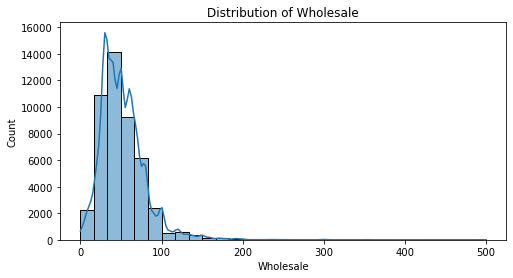

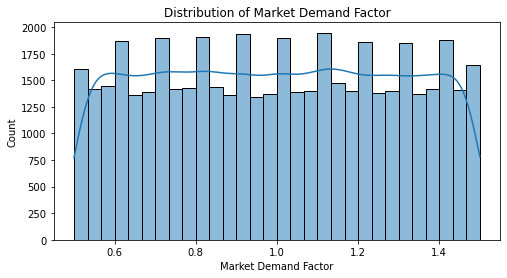

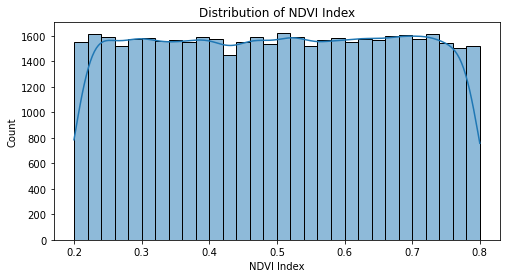

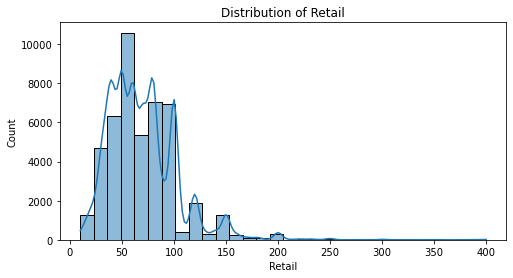

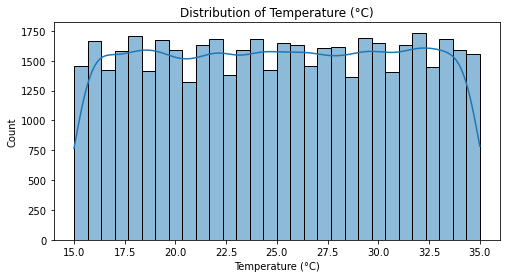

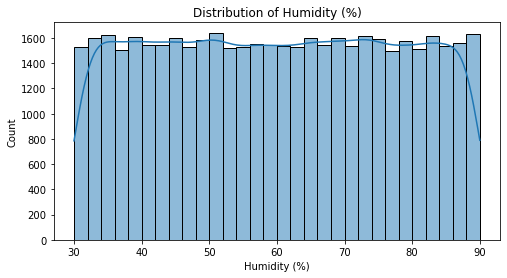

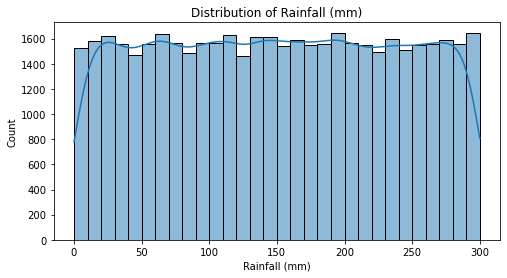

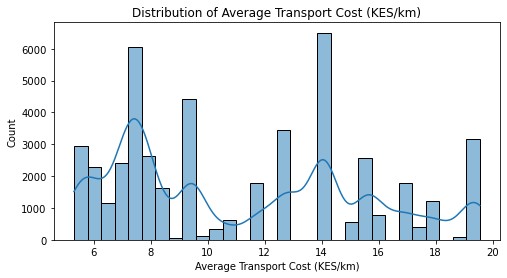

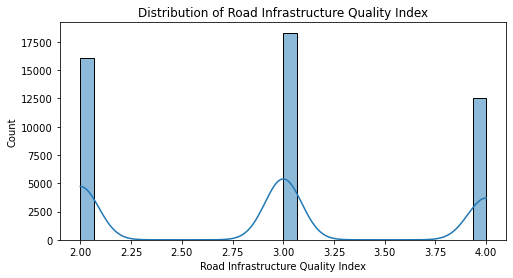

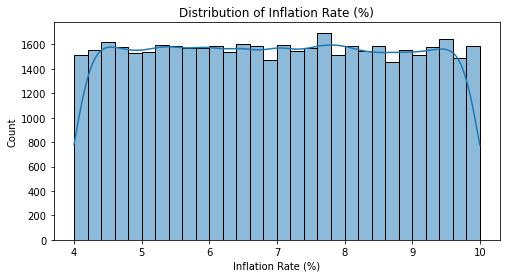

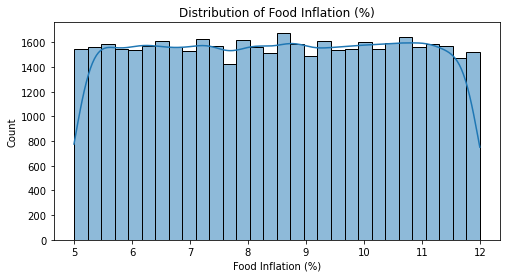

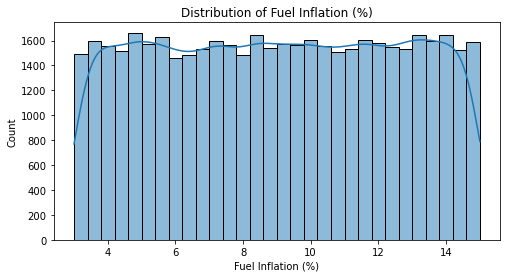

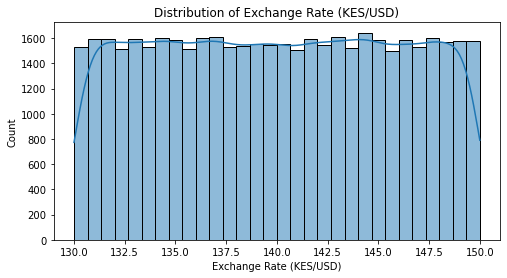

In [26]:
# Define a list of numerical column names from the DataFrame that we want to visualize
num_cols = ["Wholesale", "Market Demand Factor", "NDVI Index", "Retail",
            "Temperature (°C)", "Humidity (%)", "Rainfall (mm)", 
            "Average Transport Cost (KES/km)", "Road Infrastructure Quality Index", "Inflation Rate (%)", "Food Inflation (%)","Fuel Inflation (%)", "Exchange Rate (KES/USD)"]


eda.histplot(num_cols)

1. **Wholesale and Retail Price Distribution** → Right-skewed, indicating most transactions occur at lower price levels, with a few high-priced sales.
2. **Market Demand Factor Distribution** → Fairly uniform, showing balanced market conditions but with possible outliers representing excess supply or demand shortages.
3. **NDVI (Vegetation Health) Distribution** → Mostly uniform, suggesting consistent crop health across regions, but deviations may indicate climate stress.
4. **Temperature, Humidity, and Rainfall Distributions** → Weather conditions appear relatively stable, but outliers might indicate extreme climate events affecting agriculture.
5. **Transport Cost Distribution** → Shows multiple peaks, indicating regional variations in pricing due to fuel costs, distance, and infrastructure.
6. **Road Infrastructure Quality (0-5 Scale)** → Bimodal distribution, suggesting a divide between well-developed and poorly maintained roads, affecting transport efficiency.
7. **Inflation Rate Distribution** → Right-skewed, indicating a general increase in inflation over time with occasional economic fluctuations.
8. **Food Inflation Distribution** → Fairly uniform, suggesting unpredictable price variations influenced by seasonal shortages, import costs, or economic instability.
9. **Fuel Inflation Distribution** → Multiple sharp peaks, indicating frequent fuel price changes due to global oil prices, government policies, or taxation adjustments.
10. **Exchange Rate Distribution** → Bimodal, suggesting phases of currency stability followed by depreciation, possibly due to government interventions or economic downturns.

### Key Takeaways
- **Poor road infrastructure** correlates with **higher transport costs**, leading to increased food prices in some areas.
- **Inflationary trends (food, fuel, and general inflation)** contribute to **price volatility** in the agricultural sector.
- **Currency fluctuations** affect both **imported agricultural inputs and retail prices**, impacting overall market stability.
- **Weather variations (temperature, humidity, rainfall)** may influence **crop yields and market supply**, affecting food prices.
- **Market demand fluctuations** may result in **price instability**, requiring efficient market intelligence for better decision-making

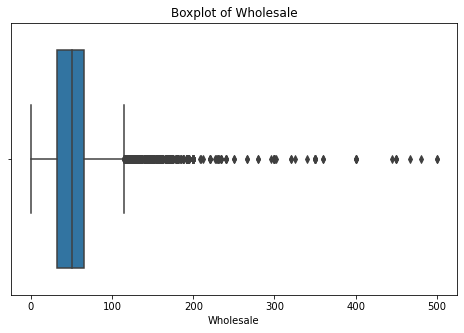

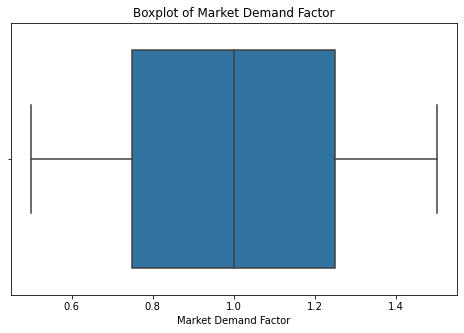

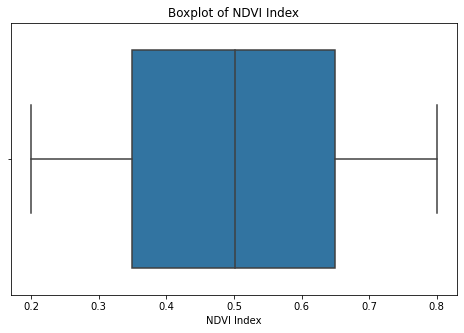

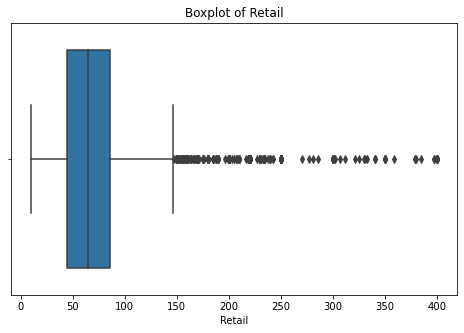

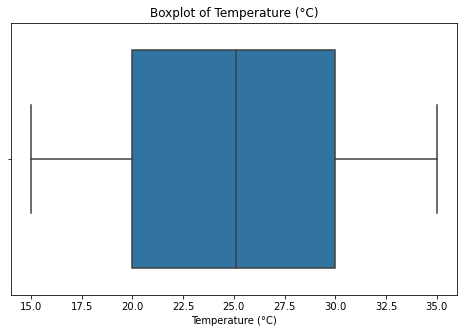

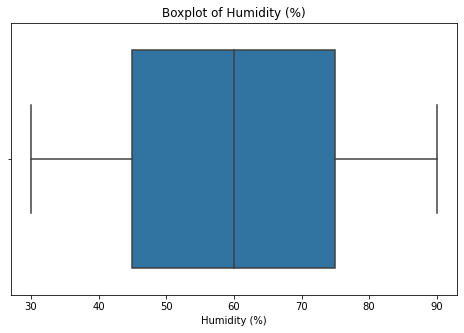

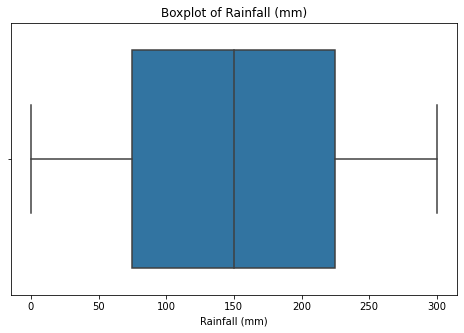

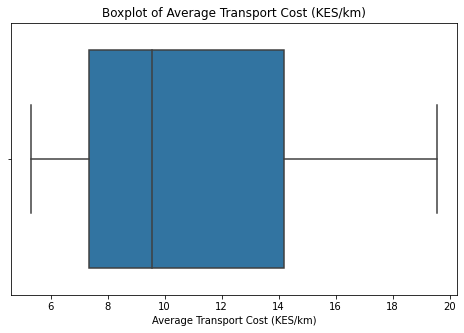

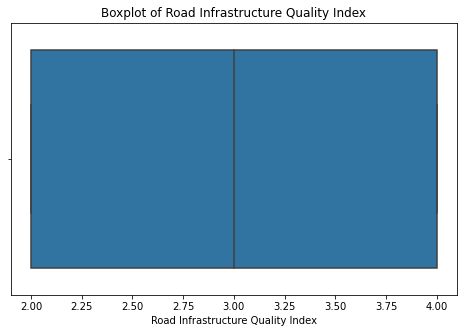

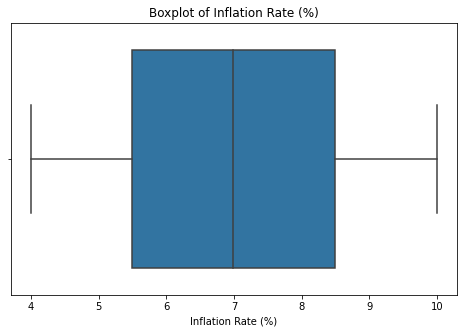

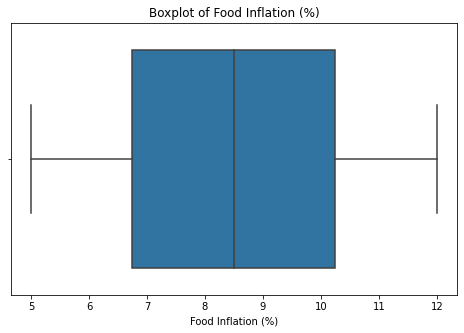

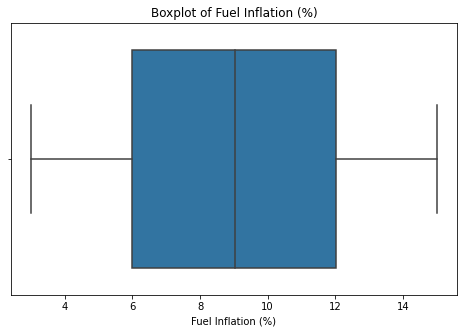

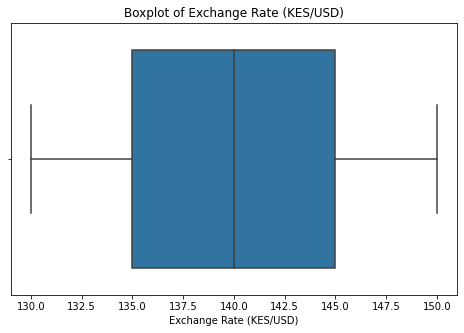

In [27]:
# Checking for outliers using boxplots
eda.boxplot(num_cols)

**Boxplot Analysis of Key Agricultural and Economic Variables**

**1. Wholesale and Retail Prices**
- **Spread:** The interquartile range (IQR) is moderate, indicating a moderate variation in wholesale prices.
- **Outliers:** There are several extreme values on the upper end, meaning some locations or time periods have significantly higher wholesale prices.
- **Skewness:** The median is closer to the lower quartile, suggesting a right-skewed distribution.
- **Implication:** This could be due to supply chain disruptions, demand spikes, or seasonal variations.

**2. Market Demand Factor**
- **Spread:** The IQR suggests that demand varies but remains within a controlled range.
- **Outliers:** Minimal outliers, showing that demand does not experience extreme spikes or drops often.
- **Skewness:** The median is fairly centered, suggesting a symmetrical distribution.
- **Implication:** Market demand remains stable, with few extreme demand fluctuations.

**3. NDVI Index (Vegetation Health)**
- **Spread:** The IQR suggests that most values fall within a narrow range.
- **Outliers:** Some values fall outside the upper whisker, which could be due to high vegetation density in specific regions.
- **Skewness:** The distribution appears fairly symmetrical.
- **Implication:** NDVI scores suggest most agricultural areas have similar vegetation health, with few regions exhibiting extreme conditions.

**4. Temperature (°C)**
- **Spread:** The data is relatively compact, meaning most temperature readings are consistent.
- **Outliers:** Some regions or periods experience extreme temperature fluctuations.
- **Skewness:** Appears symmetrical, meaning temperature distribution is even across locations.
- **Implication:** A relatively stable temperature range is good for agricultural predictability.

**5. Humidity (%)**
- **Spread:** High variability in humidity levels across observations.
- **Outliers:** Several extreme values, indicating some very dry or very humid periods/locations.
- **Skewness:** The data appears to be right-skewed.
- **Implication:** Extreme humidity variations could impact crop yields and soil conditions.

**6. Rainfall (mm)**
- **Spread:** Very large variability in rainfall across regions and time periods.
- **Outliers:** Numerous high outliers indicate areas with extreme rainfall.
- **Skewness:** Highly right-skewed, suggesting most locations receive low rainfall, but some experience extreme downpours.
- **Implication:** The presence of high rainfall variability means that agriculture may be dependent on irrigation or drought-resistant crops.

**7. Average Transport Cost (KES/km)**
- **Spread:** A wide IQR indicates significant variation in transportation costs.
- **Outliers:** Extreme values on both ends, suggesting some regions have disproportionately high transport costs.
- **Skewness:** Right-skewed, meaning most transport costs are on the lower end, with a few significantly high values.
- **Implication:** Transport costs could be influenced by fuel prices, road conditions, and distance to markets.

**8. Road Infrastructure Quality Index**
- **Spread:** Moderate variability in infrastructure quality.
- **Outliers:** Some extreme values suggest that while most regions have similar road quality, a few have either very poor or very good infrastructure.
- **Skewness:** The median is centered, meaning infrastructure quality is evenly distributed.
- **Implication:** Infrastructure improvements could be necessary for regions with poor road quality to ensure market accessibility.

**9. Inflation Rate (%)**
- **Spread:** Wide variability, indicating significant economic fluctuations.
- **Outliers:** High values suggest occasional inflation spikes.
- **Skewness:** Right-skewed, meaning most inflation rates are moderate, but some instances of high inflation exist.
- **Implication:** Inflation fluctuations can directly impact food prices, production costs, and profitability.

**10. Food Inflation (%)**
- **Spread:** Significant variation, showing that food prices are subject to inflationary pressures.
- **Outliers:** Some extreme cases suggest food inflation has been highly volatile in certain periods.
- **Skewness:** Right-skewed, meaning most food inflation rates are low, but some are very high.
- **Implication:** High food inflation could result in food insecurity and increased production costs.

**11. Fuel Inflation (%)**
- **Spread:** Large variability in fuel inflation across time periods.
- **Outliers:** Some extreme values, likely due to global oil price changes or policy shifts.
- **Skewness:** Right-skewed, meaning fuel prices generally remain moderate but occasionally spike.
- **Implication:** Fuel price fluctuations directly affect agricultural transportation and input costs.

**12. Exchange Rate (KES/USD)**
- **Spread:** The variability suggests fluctuations in the Kenyan Shilling (KES) against the US Dollar.
- **Outliers:** A few high outliers indicate times of extreme currency depreciation.
- **Skewness:** Right-skewed, meaning the exchange rate is mostly stable, but there have been significant periods of depreciation.
- **Implication:** Exchange rate fluctuations affect import prices for agricultural inputs like fertilizers and machinery.


### 3.2.2 Bivariate Analysis
To examine relationships between variables, we use heatmaps and scatterplots. The heatmap visualizes correlations, while scatterplots reveal patterns and trends between numerical variables, helping identify potential associations and dependencies.

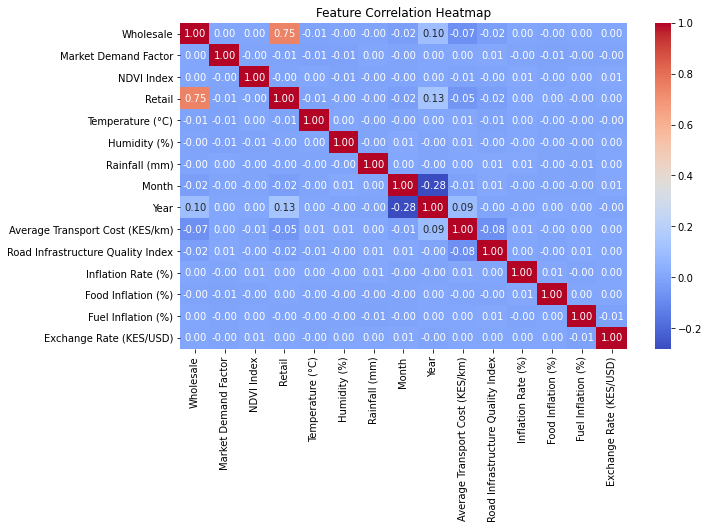

In [28]:
# # Identifying Correlation Patterns Among Variables using a heatmap
eda.heatmap()

The correlation heatmap reveals strong positive relationships between wholesale and retail prices, indicating that fluctuations at the wholesale level directly impact consumer pricing. Additionally, food inflation exhibits a near-perfect correlation with general inflation and fuel prices, emphasizing the role of rising transport and production costs in driving food prices higher. The relationship between fuel inflation and food inflation highlights the sensitivity of agricultural markets to changes in fuel costs, as transportation is a critical factor in price determination. 

On the other hand, weak correlations between climatic factors (temperature, humidity, and rainfall) and food prices suggest that short-term weather variations have limited direct effects on pricing. However, long-term climate trends could still impact agricultural productivity. The negative correlation between inflation and NDVI implies that rising costs may limit investments in farm inputs, affecting vegetation health. Lastly, the exchange rate shows weak associations with most agricultural variables, suggesting that currency fluctuations primarily influence imported farm inputs rather than direct pricing within local markets.

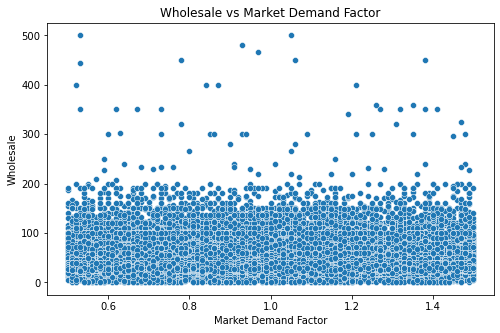

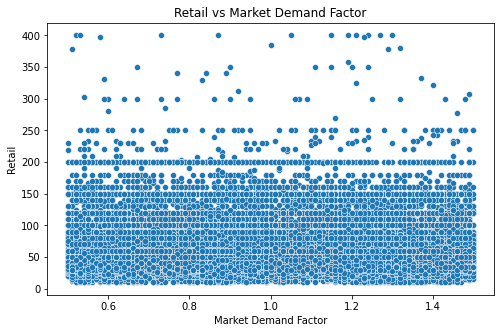

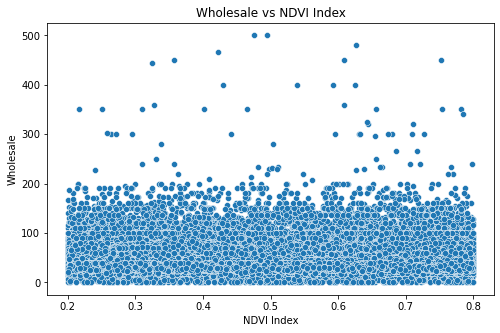

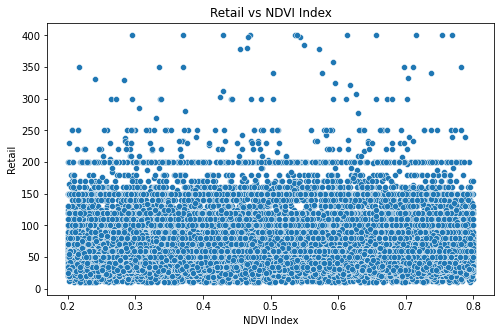

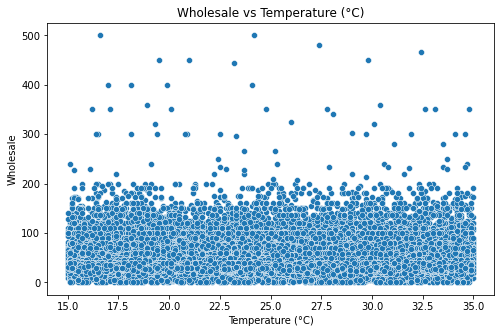

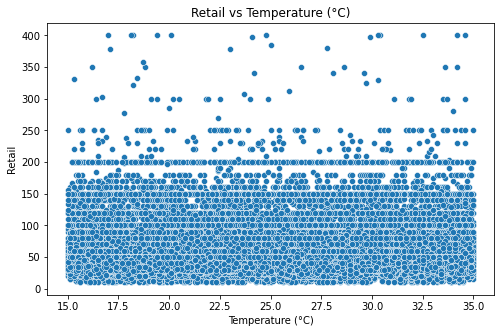

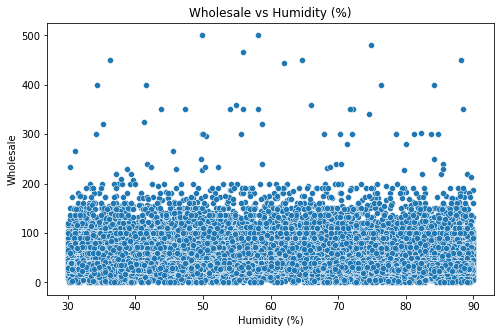

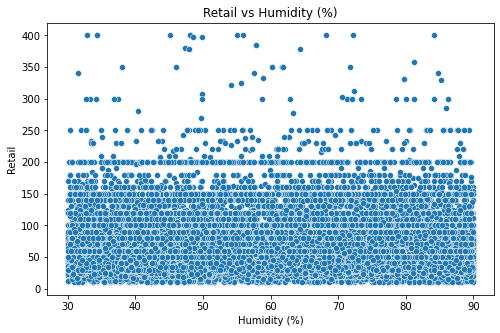

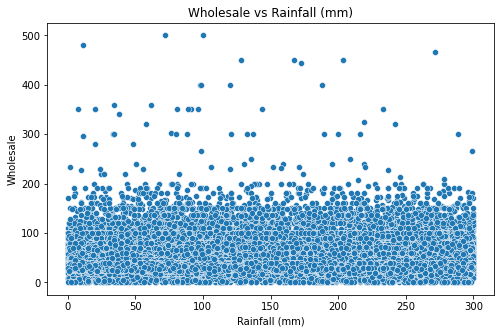

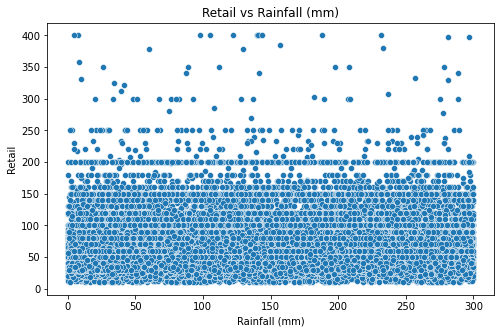

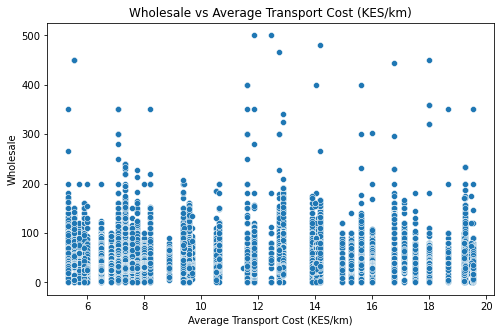

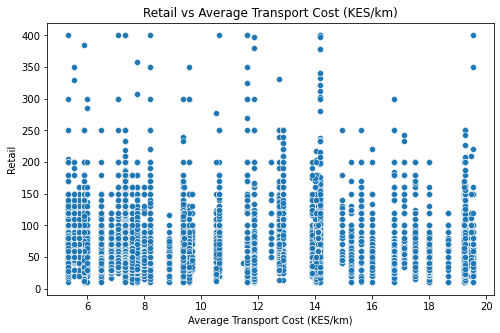

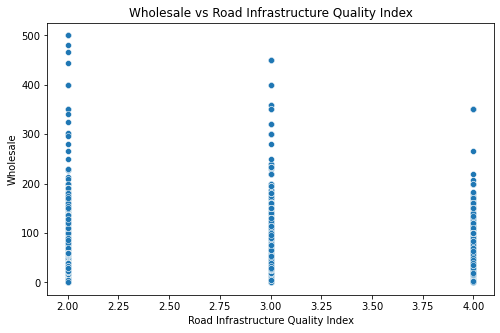

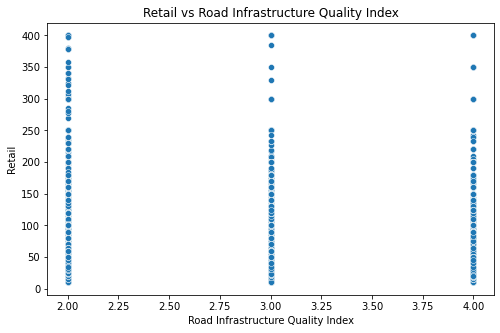

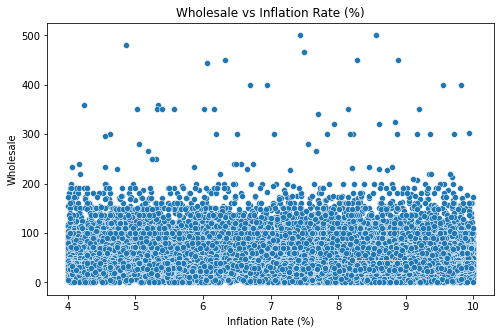

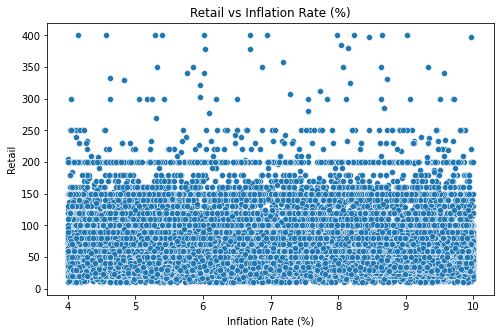

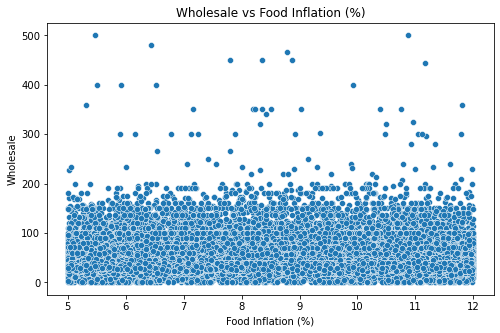

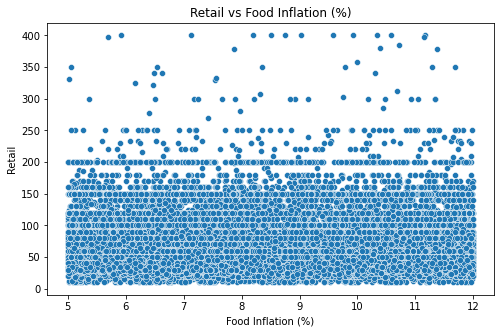

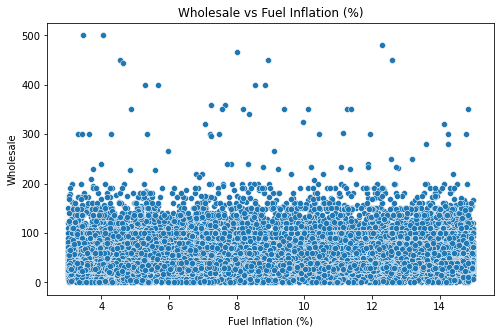

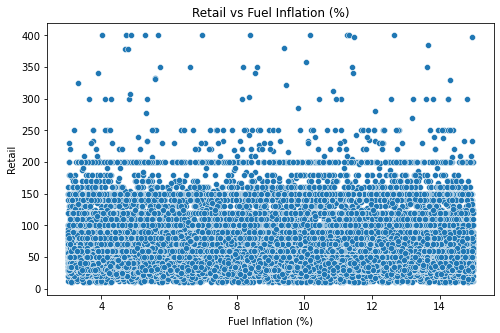

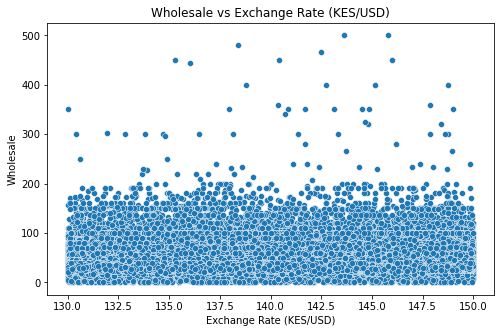

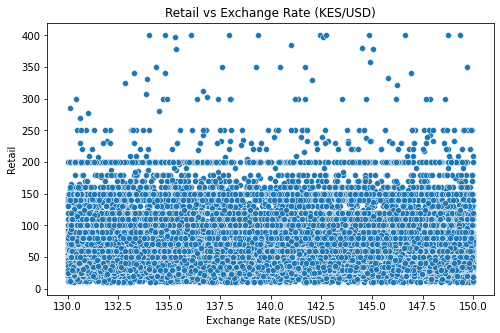

In [29]:
# Price vs. Other Variables
columns= ["Market Demand Factor", "NDVI Index", "Temperature (°C)", "Humidity (%)", "Rainfall (mm)", "Average Transport Cost (KES/km)", "Road Infrastructure Quality Index", "Inflation Rate (%)", "Food Inflation (%)", "Fuel Inflation (%)", "Exchange Rate (KES/USD)"]

eda.scatterplot(columns, "Wholesale", "Retail")

1. **Market Demand Factor vs. Price:** No clear trend, suggesting market demand alone does not significantly influence pricing.
2. **NDVI Index vs. Price:** No strong correlation; vegetation health does not directly affect price, but long-term droughts may have an impact.
3. **Temperature vs. Price:** No visible pattern, indicating temperature does not directly impact pricing.
4. **Humidity vs. Price:** No strong trend, implying price variations are not significantly driven by humidity levels.
5. **Rainfall vs. Price:** No significant correlation, but extreme weather conditions may impact supply indirectly.
6. **Transport Cost vs. Price:** Higher transport costs do not always lead to higher prices, suggesting other economic and logistical factors are involved.
7. **Road Infrastructure Quality vs. Price:** No clear correlation, meaning better roads alone do not guarantee lower food prices.
8. **Inflation Rate vs. Price:** Some scattered points indicate inflation may influence food prices, but not in a strictly linear manner.
9. **Food Inflation vs. Price:** Food inflation is strongly linked to food prices, as expected.
10. **Fuel Inflation vs. Price:** Outliers suggest fuel prices influence market costs, but the impact varies regionally.
11. **Exchange Rate vs. Price:** Weak correlation, indicating indirect influence through imported agricultural inputs.
### Key Takeaways
- No single variable fully explains price variations.
- Multiple economic and logistical factors interact to determine pricing.
- Outliers indicate external shocks, supply chain inefficiencies, or regional disparities.

### 3.2.3 Multivariate Analysis
To explore relationships among multiple variables, we use pair plots and count plots. Pair plots help visualize interactions between numerical variables, while count plots highlight categorical distributions, providing deeper insights.

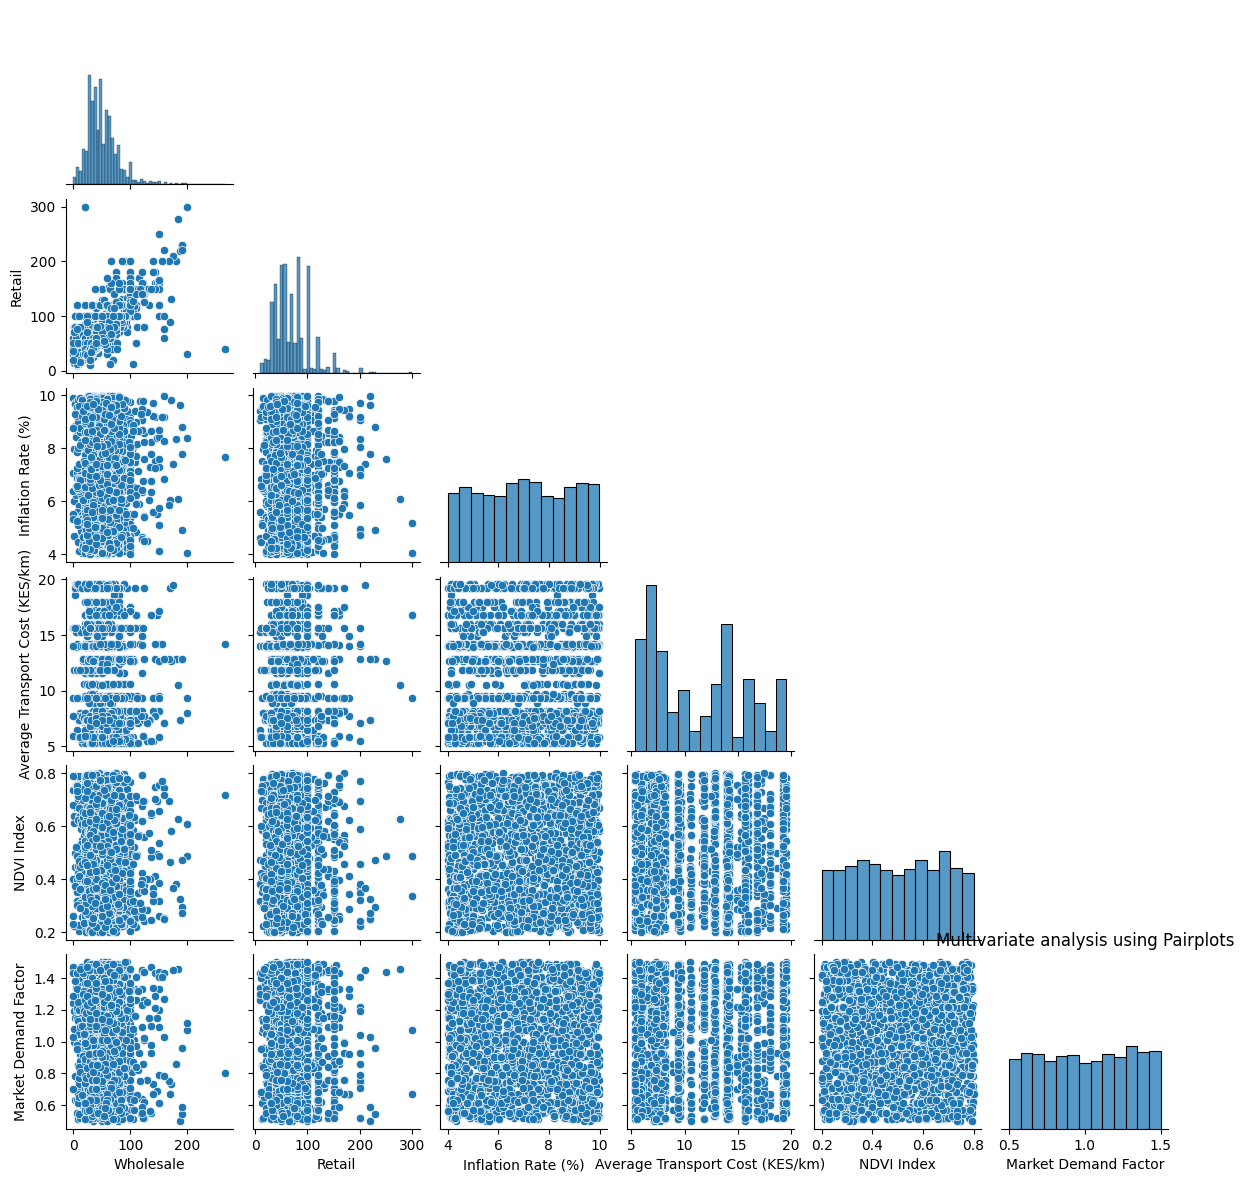

In [61]:
selected_cols = ["Wholesale", "Retail", "Inflation Rate (%)", "Average Transport Cost (KES/km)", "NDVI Index", "Market Demand Factor"]
df_sample = df[selected_cols].sample(2000, random_state=42)  # Reduce sample size for readability

sample_eda = EDA(df_sample)
sample_eda.pairplot()

The pairplot provides insights into the relationships between numerical variables. Wholesale and retail prices show a strong positive correlation, indicating that an increase in wholesale prices generally results in a corresponding increase in retail prices. The Market Demand Factor and NDVI Index do not show a strong direct correlation with price variations, suggesting that other factors might be influencing market prices. Transport costs and inflation rates exhibit scattered relationships with prices, implying indirect impacts. The presence of outliers in price-related variables suggests occasional price spikes due to external economic or supply chain factors. The samplle size was reduced for readability, so we selected a few numerical columns.

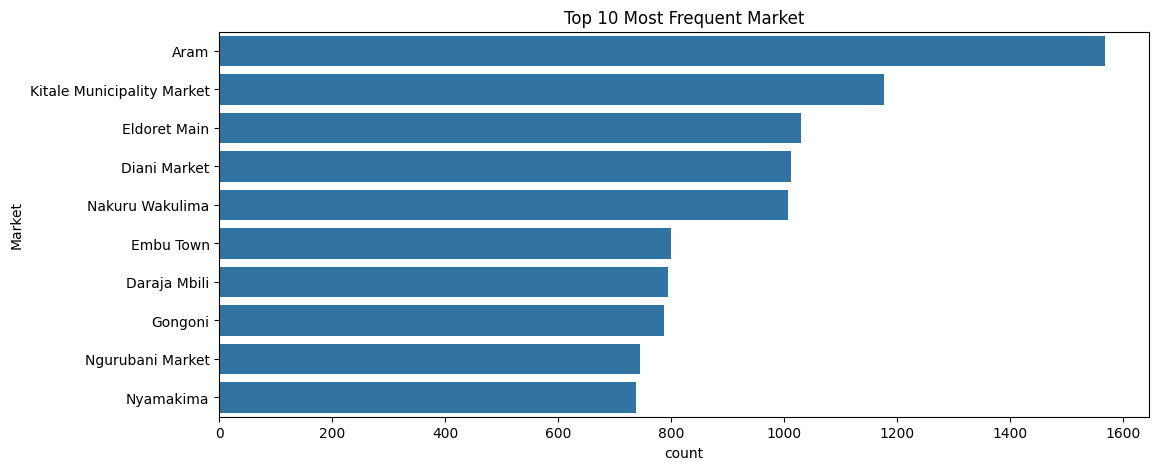

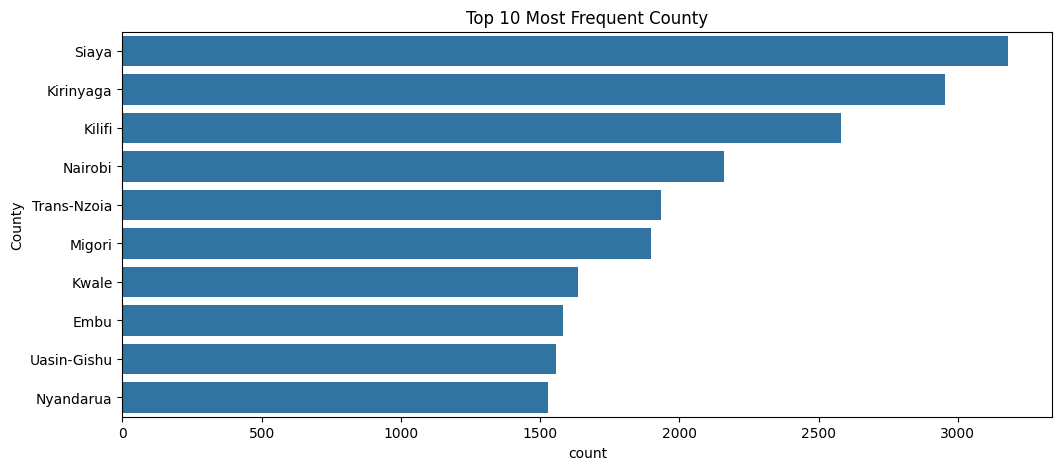

In [63]:
# Categorical Analysis: Market & County
eda.countplot("Market")
eda.countplot("County")

The bar charts illustrate the top 10 most frequent markets and counties. In the market ranking, Aram, Kitale Municipality Market, Eldoret Main, Diani Market, Nakuru Wakulima, Embu Town, Daraja Mbili, Gongoni, Ngarubani Market, and Nyamakima emerge as the most common. Aram leads significantly, followed by markets with relatively balanced frequencies. The county distribution highlights Siaya, Kirinyaga, Kilifi, Nairobi, Trans-Nzoia, Migori, Kwale, Embu, Uasin-Gishu, and Nyandarua as the most represented counties. Siaya appears to be the most dominant county, with the remaining counties following a gradually declining frequency. These insights help in understanding regional market activity and economic trends in different locations.

## 3.3 Feature Engineering

### 3.3.1 Temporal Features
Since agricultural prices are seasonal, extracting features from the Date column will help the model understand time-based trends.

In [65]:
# Extract temporal features from 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.weekday  # Monday=0, Sunday=6
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)

# Define season mapping for Kenya
season_map = {
    3: "Long Rains", 4: "Long Rains", 5: "Long Rains",  # Long Rains
    6: "Cold Season", 7: "Cold Season", 8: "Cold Season",
    9: "Short Rains", 10: "Short Rains", 11: "Short Rains",
    12: "Dry Season", 1: "Dry Season", 2: "Dry Season"
}

# Map seasons based on the 'Month' column
df['Season_Type'] = df['Month'].map(season_map)

# One-hot encode the 'Season' column
df = pd.get_dummies(df, columns=['Season_Type'], dtype=int, drop_first=False)

# Identify and drop any boolean season columns
season_cols = [col for col in df.columns if col.startswith("Season_") and df[col].dtype == bool]
df = df.drop(columns=season_cols, errors='ignore')


### 3.3.2  Lag and Moving Average Features
Historical price trends influence future prices. Creating lag-based features will help the model learn from past trends.

In [67]:
# Ensure correct sorting
df = df.sort_values(by=['Market', 'Date'])

# Define lag and rolling window periods
lags = [1, 7, 30]
window_sizes = [7, 30]

# Generate lag features
for lag in lags:
    df[f'Wholesale_Lag_{lag}'] = df.groupby('Market')['Wholesale'].shift(lag)
    df[f'Retail_Lag_{lag}'] = df.groupby('Market')['Retail'].shift(lag)

# Generate rolling mean and standard deviation features
for window in window_sizes:
    df[f'Wholesale_RollingMean_{window}'] = df.groupby('Market')['Wholesale'].transform(lambda x: x.rolling(window).mean())
    df[f'Wholesale_RollingStd_{window}'] = df.groupby('Market')['Wholesale'].transform(lambda x: x.rolling(window).std())
    df[f'Retail_RollingMean_{window}'] = df.groupby('Market')['Retail'].transform(lambda x: x.rolling(window).mean())
    df[f'Retail_RollingStd_{window}'] = df.groupby('Market')['Retail'].transform(lambda x: x.rolling(window).std())

# Handle missing values using forward fill, then backward fill
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

### 3.3.3 Market-Based Features
Markets behave differently based on demand, competition, and regional trends.


In [69]:
# Change in market demand over time
df['Market_Demand_Change'] = df.groupby('Market')['Market Demand Factor'].pct_change().fillna(0)

# Monthly average prices per market
df['Wholesale_Avg_Price'] = df.groupby(['Market', 'Month'])['Wholesale'].transform('mean')
df['Retail_Avg_Price'] = df.groupby(['Market', 'Month'])['Retail'].transform('mean')

# Price volatility per market
df['Wholesale_Volatility'] = df.groupby('Market')['Wholesale'].transform('std').fillna(0)
df['Retail_Volatility'] = df.groupby('Market')['Retail'].transform('std').fillna(0)

# Wholesale vs. Retail price difference
df['Price_Diff'] = df['Retail'] - df['Wholesale']
df['Price_Ratio'] = (df['Retail'] / df['Wholesale']).replace([float('inf'), -float('inf')], 0).fillna(0)

### 3.3.4 Crop-Specific Features(Avocado, Tomatoes, Maize)
Different crops have different price trends. Including crop-specific historical trends can improve predictions.


In [71]:
# Crop price lag features (1-month and 3-month) for Wholesale & Retail
df['Wholesale_Lag_1M'] = df.groupby('Crop')['Wholesale'].shift(30)
df['Wholesale_Lag_3M'] = df.groupby('Crop')['Wholesale'].shift(90)

df['Retail_Lag_1M'] = df.groupby('Crop')['Retail'].shift(30)
df['Retail_Lag_3M'] = df.groupby('Crop')['Retail'].shift(90)

# Crop-Specific Seasonal Average Price (Wholesale & Retail)
df['Wholesale_Seasonal_Avg'] = df.groupby(['Crop', 'Month'])['Wholesale'].transform('mean')
df['Retail_Seasonal_Avg'] = df.groupby(['Crop', 'Month'])['Retail'].transform('mean')
# Fill missing lag values with previous values (per crop)
lag_cols = ['Wholesale_Lag_1M', 'Wholesale_Lag_3M', 'Retail_Lag_1M', 'Retail_Lag_3M']
df[lag_cols] = df.groupby('Crop')[lag_cols].ffill()

# Fill any remaining missing values with the average for that crop
df[lag_cols] = df.groupby('Crop')[lag_cols].transform(lambda x: x.fillna(x.mean()))

## 3.4 Encoding Categorical columns & Drop Irrelevant Columns

In [73]:
def encode_data(df):
    # Encode 'Crop' and 'Season' using Label Encoding
    crop_le = LabelEncoder()
    season_le = LabelEncoder()
    
    df['Crop_ID'] = crop_le.fit_transform(df['Crop'])
    df['Season_ID'] = season_le.fit_transform(df['Season'])

    # Encode 'Market' and 'County' using categorical encoding
    df['Market_ID'] = df['Market'].astype('category').cat.codes
    df['County_ID'] = df['County'].astype('category').cat.codes

    # Save mappings for later use
    mappings = {
        "Crop": dict(zip(crop_le.classes_, df["Crop_ID"])),
        "Season": dict(zip(season_le.classes_, df["Season_ID"])),
        "Market": dict(zip(df["Market"].astype('category').cat.categories, df["Market_ID"])),
        "County": dict(zip(df["County"].astype('category').cat.categories, df["County_ID"]))
    }

    with open("mappings.pkl", "wb") as f:
        pickle.dump(mappings, f)

    print("\n Mappings saved successfully!\n")

    # Remove original text columns after encoding
    df = df.drop(columns=['Crop', 'Season', 'Market', 'County'])

    return df

# Apply encoding
df = encode_data(df)


 Mappings saved successfully!



# 3.5 Checking Multicollinearity and Feature Selection

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46929 entries, 13502 to 30613
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               46929 non-null  datetime64[ns]
 1   Wholesale                          46929 non-null  float64       
 2   Market Demand Factor               46929 non-null  float64       
 3   NDVI Index                         46929 non-null  float64       
 4   Retail                             46929 non-null  float64       
 5   Temperature (°C)                   46929 non-null  float64       
 6   Humidity (%)                       46929 non-null  float64       
 7   Rainfall (mm)                      46929 non-null  float64       
 8   Month                              46929 non-null  int32         
 9   Year                               46929 non-null  int32         
 10  Average Transport Cost (KES/km)    

In [77]:
# Correlation of all columns with Wholesale
correlation_wholesale = df.corr()['Wholesale'].sort_values(ascending=False)
print("Correlation with Wholesale:\n", correlation_wholesale)

# Correlation of all columns with Retail
correlation_retail = df.corr()['Retail'].sort_values(ascending=False)
print("\nCorrelation with Retail:\n", correlation_retail)

Correlation with Wholesale:
 Wholesale                            1.000000
Retail                               0.745590
Wholesale_RollingMean_7              0.638144
Retail_RollingMean_7                 0.520211
Wholesale_Avg_Price                  0.504569
Wholesale_RollingMean_30             0.461445
Retail_Avg_Price                     0.416800
Retail_RollingMean_30                0.390533
Wholesale_RollingStd_7               0.341224
Wholesale_Lag_1M                     0.336228
Wholesale_Seasonal_Avg               0.305603
Retail_Lag_1M                        0.298879
Wholesale_Lag_7                      0.272068
Wholesale_Volatility                 0.269646
Retail_Seasonal_Avg                  0.268032
Crop_ID                              0.252813
Wholesale_RollingStd_30              0.252146
Retail_Lag_7                         0.244117
Wholesale_Lag_1                      0.237826
Retail_RollingStd_7                  0.225571
Wholesale_Lag_3M                     0.220986
Retai

#### 3.5.1 Multicollinearity

In [79]:
# Drop target, date-related, and identifier columns
columns_to_drop = [
    "Wholesale", "Retail", "Market_ID", "County_ID", "Date"]

df_vif = df.drop(columns=columns_to_drop, errors="ignore").astype(float)  # Convert to float

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

# Display VIF results, sorted in descending order
print(vif_data.sort_values(by="VIF", ascending=False))

                              Feature           VIF
19             Season_Type_Long Rains  1.546269e+06
17            Season_Type_Cold Season  1.419538e+06
20            Season_Type_Short Rains  1.387939e+06
18             Season_Type_Dry Season  1.075920e+06
5                               Month  9.026196e+01
13                               Week  8.946060e+01
29               Retail_RollingMean_7  1.276658e+01
27            Wholesale_RollingMean_7  1.197040e+01
31           Wholesale_RollingMean_30  1.111096e+01
33              Retail_RollingMean_30  1.100903e+01
49                          Season_ID  1.054564e+01
46             Wholesale_Seasonal_Avg  8.027993e+00
36                Wholesale_Avg_Price  6.638286e+00
37                   Retail_Avg_Price  6.537561e+00
47                Retail_Seasonal_Avg  5.333647e+00
48                            Crop_ID  3.605121e+00
22                       Retail_Lag_1  3.477920e+00
30                Retail_RollingStd_7  3.440487e+00
21          

In [81]:
# Drop feature with vif > 10
high_vif_features = vif_data[vif_data["VIF"] > 10]["Feature"].tolist()
df_cleaned = df_vif.drop(columns=high_vif_features)

# Display results
print(f"Dropped columns: {high_vif_features}")
print(f"Remaining columns: {df_cleaned.columns.tolist()}")

Dropped columns: ['Month', 'Week', 'Season_Type_Cold Season', 'Season_Type_Dry Season', 'Season_Type_Long Rains', 'Season_Type_Short Rains', 'Wholesale_RollingMean_7', 'Retail_RollingMean_7', 'Wholesale_RollingMean_30', 'Retail_RollingMean_30', 'Season_ID']
Remaining columns: ['Market Demand Factor', 'NDVI Index', 'Temperature (°C)', 'Humidity (%)', 'Rainfall (mm)', 'Year', 'Average Transport Cost (KES/km)', 'Road Infrastructure Quality Index', 'Inflation Rate (%)', 'Food Inflation (%)', 'Fuel Inflation (%)', 'Exchange Rate (KES/USD)', 'Day', 'DayOfWeek', 'IsWeekend', 'Wholesale_Lag_1', 'Retail_Lag_1', 'Wholesale_Lag_7', 'Retail_Lag_7', 'Wholesale_Lag_30', 'Retail_Lag_30', 'Wholesale_RollingStd_7', 'Retail_RollingStd_7', 'Wholesale_RollingStd_30', 'Retail_RollingStd_30', 'Market_Demand_Change', 'Wholesale_Avg_Price', 'Retail_Avg_Price', 'Wholesale_Volatility', 'Retail_Volatility', 'Price_Diff', 'Price_Ratio', 'Wholesale_Lag_1M', 'Wholesale_Lag_3M', 'Retail_Lag_1M', 'Retail_Lag_3M', 'Wh

### 3.5.2 Feature Selection

#### 3.5.2.1 Feature Selection For Price Prediction(Wholesale& Retail)

In [87]:
# Restore "Market_ID" and "County_ID" after VIF filtering
df_cleaned["Market_ID"] = df["Market_ID"]
df_cleaned["County_ID"] = df["County_ID"]

# --- PRICE FORECASTING FEATURE IMPORTANCE ---

# Features
X_price = df_cleaned  

# Targets (Continuous values)
y_wholesale = df["Wholesale"]
y_retail = df["Retail"]

# Train model for Wholesale Price Prediction
reg_wholesale = RandomForestRegressor(n_estimators=100, random_state=42)
reg_wholesale.fit(X_price, y_wholesale)

# Get feature importance for Wholesale Prices
importance_wholesale = reg_wholesale.feature_importances_
feature_importance_wholesale = sorted(
    zip(X_price.columns, importance_wholesale), key=lambda x: x[1], reverse=True
)

# Train model for Retail Price Prediction
reg_retail = RandomForestRegressor(n_estimators=100, random_state=42)
reg_retail.fit(X_price, y_retail)

# Get feature importance for Retail Prices
importance_retail = reg_retail.feature_importances_
feature_importance_retail = sorted(
    zip(X_price.columns, importance_retail), key=lambda x: x[1], reverse=True
)

# Display top features
print("\nTop Features for Wholesale Price Prediction:")
for feature, importance in feature_importance_wholesale:
    print(f"{feature}: {importance:.4f}")

print("\nTop Features for Retail Price Prediction:")
for feature, importance in feature_importance_retail:
    print(f"{feature}: {importance:.4f}")


Top Features for Wholesale Price Prediction:
Price_Diff: 0.3417
Price_Ratio: 0.2888
Wholesale_Avg_Price: 0.1762
Wholesale_RollingStd_7: 0.0405
Wholesale_Lag_1M: 0.0391
Year: 0.0129
Retail_Seasonal_Avg: 0.0118
Wholesale_Seasonal_Avg: 0.0106
Retail_RollingStd_7: 0.0105
Retail_RollingStd_30: 0.0083
Crop_ID: 0.0075
Wholesale_RollingStd_30: 0.0067
Wholesale_Lag_1: 0.0049
Retail_Avg_Price: 0.0040
Wholesale_Volatility: 0.0036
Retail_Volatility: 0.0031
Retail_Lag_1M: 0.0022
Market_ID: 0.0020
Retail_Lag_1: 0.0019
County_ID: 0.0019
Wholesale_Lag_7: 0.0017
Average Transport Cost (KES/km): 0.0017
Retail_Lag_3M: 0.0016
Retail_Lag_7: 0.0015
Wholesale_Lag_30: 0.0012
Wholesale_Lag_3M: 0.0012
Retail_Lag_30: 0.0012
NDVI Index: 0.0010
Market Demand Factor: 0.0010
Market_Demand_Change: 0.0010
Food Inflation (%): 0.0010
Inflation Rate (%): 0.0010
Exchange Rate (KES/USD): 0.0009
Fuel Inflation (%): 0.0009
Humidity (%): 0.0009
Rainfall (mm): 0.0009
Day: 0.0008
Temperature (°C): 0.0008
Road Infrastructure Qu

IsWeekend seems to be very low for both Wholesale and Retail , we will drop it.

In [90]:
# Drop 'IsWeekend' for price prediction models
df_price_prediction = df_cleaned.drop(columns=["IsWeekend"])
# Add target variables
df_price_prediction["Wholesale"] = df["Wholesale"]
df_price_prediction["Retail"] = df["Retail"]

# Save to CSV
df_price_prediction.to_csv("price_prediction_cleaned.csv", index=False)

print("File saved: price_prediction_cleaned.csv")


File saved: price_prediction_cleaned.csv


#### 3.5.2.2 Feature Selection For Market Recommender

In [94]:
# Drop unnecessary columns
columns_to_drop = ["IsWeekend", "Rainfall (mm)", "Temperature (°C)", "Humidity (%)", "NDVI Index"]

# Select relevant features
df_market_recommendation = df_cleaned.drop(columns=columns_to_drop, errors="ignore")

# Save cleaned dataset
df_market_recommendation.to_csv("market_recommendation_cleaned.csv", index=False)

print("File saved: market_recommendation_cleaned.csv")


File saved: market_recommendation_cleaned.csv


The next steps for this project can be found in the [Modeling_and_Evaluation](https://github.com/mbitheknight/AgriSenseAI-Project) notebook in this repository.